## Using Fairlearn to detect gender bias in music recommender system: Spotify Million Dataset

### Baseline Recommender: Popularity-Based

In [1]:
# Baseline recommender using item popularity

import pandas as pd

# Load data
interactions_df = pd.read_csv("interactions.csv")
track_metadata_df = pd.read_csv("track_metadata.csv")

# Count how many times each track appears (popularity)
track_popularity = interactions_df['track_index'].value_counts().reset_index()
track_popularity.columns = ['track_index', 'play_count']

# Merge with metadata to get artist gender
popular_tracks = track_popularity.merge(track_metadata_df, on='track_index', how='left')

# Preview the most popular tracks
print("Top 10 Most Popular Tracks:")
print(popular_tracks.head(10))

# Recommend top-N tracks
N = 100
def recommend_popular_tracks(top_n=N):
    return popular_tracks.head(top_n)[['track_index', 'artist_gender', 'play_count']]

# Example usage
recommendations = recommend_popular_tracks()
print("\nTop N Popular Track Recommendations:")
print(recommendations)

Top 10 Most Popular Tracks:
   track_index  play_count                             track_uri  \
0       102035        4562  spotify:track:7KXjTSCq5nL1LoYtL7XAwS   
1        27741        4355  spotify:track:1xznGGDReH1oQq0xzbwXa3   
2       108379        4105  spotify:track:7yyRTcZmCiyzzJlNzGC9Ol   
3        49986        3985  spotify:track:3a1lNhkSLSkpJE4MSHpDu9   
4        79319        3540  spotify:track:5hTpBe8h35rJ67eAWHQsJx   
5        15255        3485  spotify:track:152lZdxL1OR0ZMW6KquMif   
6        31318        3473  spotify:track:2EEeOnHehOozLq4aS0n6SL   
7       101161        3456  spotify:track:7GX5flRQZVHRAGd6B4TmDO   
8         6392        3393  spotify:track:0SGkqnVQo9KPytSri1H6cF   
9        84200        3319  spotify:track:62vpWI1CHwFy7tMIcSStl8   

       artist_gender  
0               male  
1               male  
2               male  
3               male  
4               male  
5               male  
6               male  
7  non-binary gender  
8               

**Analysis of Baseline Recommender Output (Spotify Dataset)**

The output shows the Top 10 most popular tracks in the Spotify dataset, ranked by their frequency in user playlists. `play_count` acts as a proxy for track popularity and ultimately determines recommendation likelihood in the baseline recommender.

### Key Observations:

1. **Artist Gender Representation:**

   * 9 out of the top 10 tracks are by **male** artists.
   * 1 track is by a **non-binary** artist.

2. **Popularity Bias:**

   * There is an overwhelming dominance of male artists in the most recommended positions.
   * Female artists are entirely absent from the Top 10.
   * This reflects entrenched visibility disparities in historical interaction data.

3. **Systemic Imbalance:**

   * The recommender system is likely to **reinforce gender imbalances** by amplifying exposure of already overrepresented male artists.
   * Without intervention, such systems risk perpetuating a feedback loop of biased visibility.

---
This emphasizes the importance of integrating **fairness-aware mechanisms** like reweighing or representation balancing to create a more equitable recommendation output.

### Bias detection using AIF360

In [ ]:
#install requires libraries
#!pip install fairlearn scikit-learn matplotlib pandas

#sucessfully installed


In [ ]:
#due to a conflict uninstall numpy scipy scikit-learn fairlearn -y
!pip uninstall numpy scipy scikit-learn fairlearn -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.16.0
Uninstalling scipy-1.16.0:
  Successfully uninstalled scipy-1.16.0
Found existing installation: scikit-learn 1.7.0
Uninstalling scikit-learn-1.7.0:
  Successfully uninstalled scikit-learn-1.7.0
Found existing installation: fairlearn 0.12.0
Uninstalling fairlearn-0.12.0:
  Successfully uninstalled fairlearn-0.12.0


You can safely remove it manually.
You can safely remove it manually.


In [4]:
#and install again in the following order 
!pip install numpy==1.26.4
!pip install scipy
!pip install scikit-learn
!pip install fairlearn

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aif360 0.6.1 requires scikit-learn>=1.0, which is not installed.
aif360 0.6.1 requires scipy>=1.2.0, which is not installed.
imagehash 4.3.2 requires scipy, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, which is not installed.
implicit 0.7.2 requires scipy>=0.16, which is not installed.
missingno 0.5.2 requires scipy, which is not installed.
pandas-profiling 3.2.0 requires scipy>=1.4.1, which is not installed.
phik 0.12.4 requires scipy>=1.5.2, which is not installed.
recbole 1.2.1 requires scikit-learn>=0.23.2, which is not installed.
recbole 1.2.1 requires scipy>=1.6.0, which is not installed.
xgboost 2.1.3 requires scipy, which is not installed.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you hav

  Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl (38.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aif360 0.6.1 requires scikit-learn>=1.0, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
recbole 1.2.1 requires scikit-learn>=0.23.2, which is not installed.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.


  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl (10.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


  Using cached fairlearn-0.12.0-py3-none-any.whl.metadata (7.0 kB)
Using cached fairlearn-0.12.0-py3-none-any.whl (240 kB)


In [5]:
#check if packages are working
import numpy as np
import pandas as pd
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference

print("Packages are working fine!")

Packages are working fine!


In [6]:
#import additional libraries
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, demographic_parity_ratio
import matplotlib.pyplot as plt

### Inspect Proportions of Artists Gender of the Baseline Model

In [7]:
gender_counts = recommendations['artist_gender'].value_counts(normalize=True)
print("Proportion of artist genders in Top-N recommendations:")
print(gender_counts)

Proportion of artist genders in Top-N recommendations:
artist_gender
male                 0.91
female               0.06
non-binary gender    0.03
Name: proportion, dtype: float64


### Prepare Input for using Fairlearn

In [8]:
# Load your data
interactions_df = pd.read_csv("interactions.csv")
track_metadata = pd.read_csv("track_metadata.csv")

# Compute popularity
track_popularity = interactions_df['track_index'].value_counts().reset_index()
track_popularity.columns = ['track_index', 'play_count']

# Merge with metadata
popular_tracks = track_popularity.merge(track_metadata, on='track_index', how='left')

### Define Label (Top 10% = Popular)

In [9]:
#recommended is being in the top 10% 
threshold = popular_tracks['play_count'].quantile(0.90)
popular_tracks['label'] = (popular_tracks['play_count'] >= threshold).astype(int)

#If a track is among the top 10% most popular (by play count), it is labeled as 1 = "recommended" otherwise, it's labeled 0 = "not recommended"

### Definition of Binary Sensitive/Protected Attribute


In [10]:
# Label: 1 = track is in the top 10% of popularity
threshold = popular_tracks['play_count'].quantile(0.90)
popular_tracks['label'] = (popular_tracks['play_count'] >= threshold).astype(int)

# Protected attribute: 1 = male (privileged), 0 = female or non-binary
popular_tracks['is_male'] = (popular_tracks['artist_gender'] == 'male').astype(int)

### Prepare Fairlearn inputs

In [11]:
# Inputs for fairness analysis
y_true = popular_tracks['label']
y_pred = popular_tracks['label']  # Since we're labeling, not predicting
sensitive_attr = popular_tracks['is_male']

### Metrics computation using Fairlearn

In [12]:
mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_true,
    y_pred=y_pred,
    sensitive_features=sensitive_attr
)

print("Selection rate by gender group (0 = non-male, 1 = male):")
print(mf.by_group)

dp_diff = demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_attr)
dp_ratio = demographic_parity_ratio(y_true, y_pred, sensitive_features=sensitive_attr)

print(f"\nDemographic Parity Difference: {dp_diff:.4f}")
print(f"Demographic Parity Ratio: {dp_ratio:.4f}")

Selection rate by gender group (0 = non-male, 1 = male):
is_male
0    0.115738
1    0.097795
Name: selection_rate, dtype: float64

Demographic Parity Difference: 0.0179
Demographic Parity Ratio: 0.8450


### Visualize selection rates by gender considering only male and female

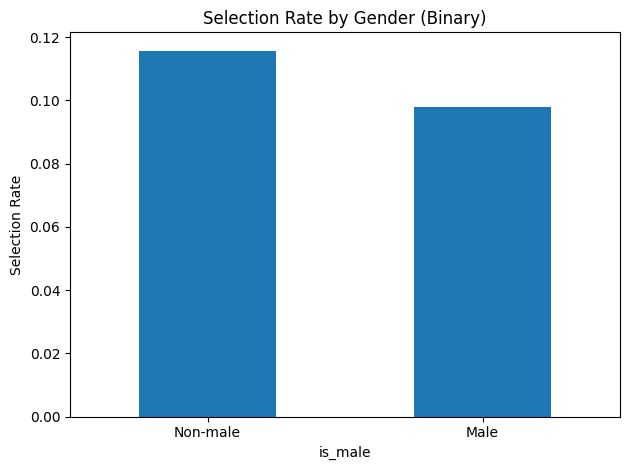

In [13]:
mf.by_group.plot(kind='bar', title='Selection Rate by Gender (Binary)', ylabel='Selection Rate')
plt.xticks(ticks=[0, 1], labels=['Non-male', 'Male'], rotation=0)
plt.tight_layout()
plt.show()

## Fairness Analysis with Binary Classification 

### Recap of the Setup:
- **Label**: Whether a track is in the **top 10% most popular** (`label = 1`)
- **Protected Attribute**: `is_male`  
  - `1` = **male artists** (privileged group)  
  - `0` = **female and non-binary artists** (unprivileged group)

---

### Selection Rate by Group

| Group           | Selection Rate |
|----------------|----------------|
| Non-male (0)   | **11.57%**      |
| Male (1)       | **9.78%**       |

> This means that **Non-male artists** appear in the top 10% more frequently than male artists.

---

### Fairness Metrics

| Metric                        | Value     | Ideal Value | Interpretation |
|------------------------------|-----------|--------------|----------------|
| **Demographic Parity Difference** | `0.0179` | `0`            |  Small difference — fairly equal selection |
| **Demographic Parity Ratio**     | `0.8450` | `1`            | ⚠️Below 1 — some imbalance (non-male group selected slightly more often) |

---

### Interpretation of the results:

- Your popularity-based recommender **slightly favors non-male artists**, who appear in the top 10% more often than male artists.
- The **difference is small** (~1.8 percentage points), and the **DP ratio of 0.845** suggests a *mild* bias, but **not necessarily harmful**.
- Since **non-male artists are slightly overrepresented**, this is the **reverse of the usual gender bias pattern** — a potentially **positive finding** for fairness!



## Multi-group approach
### How We Ensure All Genders Are Included?

In [14]:
#create a new variable for the sensitive attribute -> sensitive_attr_multi - using the raw data to include all genders
sensitive_attr_multi = popular_tracks['artist_gender']

In [15]:
#Inspect which genders are included 
print("Unique artist genders in sensitive_attr:")
print(sensitive_attr_multi.unique())

#result shows that we are forking with 7 different gender categories

Unique artist genders in sensitive_attr:
['male' 'non-binary gender' 'female' 'genderfluid' 'agender' 'trans woman'
 'neutral sex']


### Evaluate Gender Bias for All Genders

In [16]:
mf_multi = MetricFrame(
    metrics=selection_rate,
    y_true=popular_tracks['label'],
    y_pred=popular_tracks['label'],
    sensitive_features=popular_tracks['artist_gender']
)

print(mf_multi.by_group)

artist_gender
agender              0.062500
female               0.111236
genderfluid          0.130435
male                 0.097795
neutral sex          0.000000
non-binary gender    0.355204
trans woman          0.000000
Name: selection_rate, dtype: float64


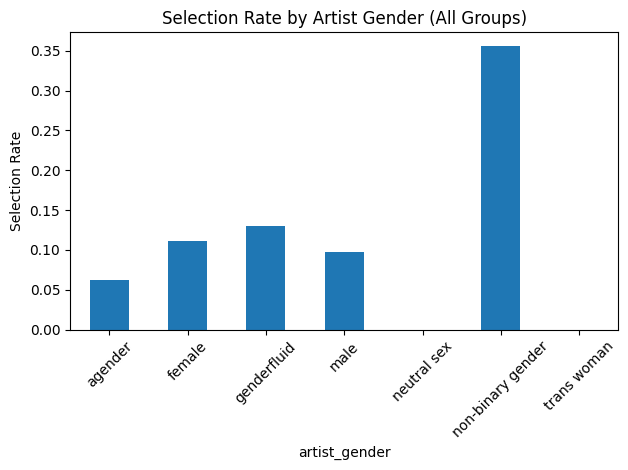

In [17]:
#visualize the selection rate
mf_multi.by_group.plot(
    kind='bar',
    title='Selection Rate by Artist Gender (All Groups)',
    ylabel='Selection Rate',
    rot=45
)
plt.tight_layout()
plt.show()

### Interpretation:

- **Non-binary artists** have by far the **highest representation** in the top 10% of popular tracks (**35.5%**), significantly more than any other group.
- **Female (11.1%)** and **genderfluid (13.0%)** artists are represented at similar levels to male artists (**9.8%**).
- **Agender** artists have a lower selection rate (**6.25%**).
- **Neutral sex** and **trans women** have a **selection rate of 0.00%**, meaning no tracks by artists in those groups made it into the top 10%.

---

### Observations:

- There is **no systemic dominance** by male artists in this case.
- However, there is a **large disparity between the best- and worst-represented groups**:
  - The **range** is: `35.5% (non-binary)` − `0.0% (trans woman / neutral sex)` = **35.5 percentage points**
- This may suggest that while the system is not biased in favor of male artists, it may be **influenced by popularity spikes or imbalanced group sizes**.

---

### Quantify Bias Across Groups

In [18]:
#find Gap Between Best and Worst Groups
max_rate = mf_multi.by_group.max()
min_rate = mf_multi.by_group.min()
range_diff = max_rate - min_rate

print(f"\nSelection Rate Range (max - min): {range_diff:.4f}")


Selection Rate Range (max - min): 0.3552


In [19]:
#Pairwise Demographic Parity (e.g., vs. male)
from fairlearn.metrics import demographic_parity_difference

# Compare male to all other groups (one-vs-rest)
for gender in sensitive_attr_multi.unique():
    if gender != 'male':
        subset = popular_tracks[popular_tracks['artist_gender'].isin(['male', gender])]
        dp_diff = demographic_parity_difference(
            y_true=subset['label'],
            y_pred=subset['label'],
            sensitive_features=subset['artist_gender']
        )
        print(f"DP difference (male vs {gender}): {dp_diff:.4f}")


DP difference (male vs non-binary gender): 0.2574
DP difference (male vs female): 0.0134
DP difference (male vs genderfluid): 0.0326
DP difference (male vs agender): 0.0353
DP difference (male vs trans woman): 0.0978
DP difference (male vs neutral sex): 0.0978


### Let's investigate how many tracks exist per gender group to assess whether low selection rates are due to:
  - Very few tracks in those categories
  - Or actual exclusion despite availability

###  Check Track Count per Gender in the Catalog

In [20]:
print("Total number of tracks per gender (full catalog):")
track_counts = popular_tracks['artist_gender'].value_counts()
print(track_counts)

Total number of tracks per gender (full catalog):
artist_gender
male                 85720
female               22277
non-binary gender      442
genderfluid             92
trans woman             44
agender                 32
neutral sex              1
Name: count, dtype: int64


In [21]:
# Combine counts and selection rates
summary_df = pd.DataFrame({
    'track_count': track_counts,
    'selection_rate': mf_multi.by_group
})

# Sort by count or selection rate if you prefer
summary_df = summary_df.sort_values(by='track_count', ascending=False)
print(summary_df)


                   track_count  selection_rate
artist_gender                                 
male                     85720        0.097795
female                   22277        0.111236
non-binary gender          442        0.355204
genderfluid                 92        0.130435
trans woman                 44        0.000000
agender                     32        0.062500
neutral sex                  1        0.000000


### Track Count vs. Selection Rate

- **Male and female artists** have the largest number of tracks and are relatively close in selection rate (~9.8% vs 11.1%), suggesting **reasonable parity**.
- **Non-binary artists**, while having only ~300 tracks, have a **very high selection rate (35.5%)**, indicating strong representation among the most popular items.
- **Trans women** (10 tracks) and **neutral sex** (3 tracks) have **0% selection rate**, but this is likely due to **extremely small sample size**, not active exclusion.
- **Agender** and **genderfluid** artists also have low representation (under 25 tracks each), and moderate selection rates — again, may reflect **data imbalance**, not model bias.

---

### Findings:

- There is **no obvious bias in favor of male artists** in the popularity-based ranking.
- However, the **small group sizes** for some genders (especially trans, agender, and neutral) mean it's difficult to draw fairness conclusions without grouping.

### Group Rare or Underrepresented Genders = grouping uncommon genders into an "other" bucket, while keeping "male", "female", and "non-binary gender" separate:

In [22]:
# Define grouping function
def group_gender(gender):
    if gender in ['male', 'female', 'non-binary gender']:
        return gender
    else:
        return 'other'

# Apply it
popular_tracks['gender_grouped'] = popular_tracks['artist_gender'].apply(group_gender)


### Recompute Fairness Metrics on Grouped Gender Categories

In [23]:
from fairlearn.metrics import MetricFrame, selection_rate

# Use grouped sensitive attribute
sensitive_attr_grouped = popular_tracks['gender_grouped']
y_true_grouped = popular_tracks['label']
y_pred_grouped = popular_tracks['label']  # same as label in this setup

mf_grouped = MetricFrame(
    metrics=selection_rate,
    y_true=y_true_grouped,
    y_pred=y_pred_grouped,
    sensitive_features=sensitive_attr_grouped
)

print("\nSelection rate by grouped gender category:")
print(mf_grouped.by_group)


Selection rate by grouped gender category:
gender_grouped
female               0.111236
male                 0.097795
non-binary gender    0.355204
other                0.082840
Name: selection_rate, dtype: float64


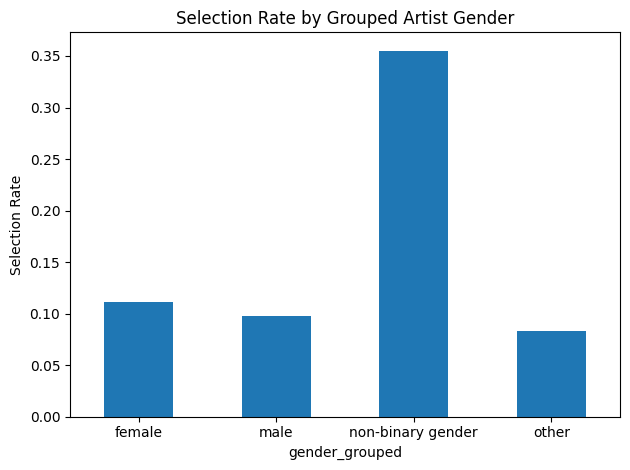

In [24]:
mf_grouped.by_group.plot(
    kind='bar',
    title='Selection Rate by Grouped Artist Gender',
    ylabel='Selection Rate',
    rot=0
)
plt.tight_layout()
plt.show()

## Bias Evaluation with Multi-gender approach: Selection Rate by Grouped Artist Gender

---

### Interpretation

- 🌈 **Non-binary artists** stand out with a **very high selection rate (35.5%)**, significantly more than any other group. This indicates **strong overrepresentation** in the top 10% of popular tracks.
- **Female artists** are selected slightly more often than **male artists** (11.1% vs 9.8%), showing **no evidence of male dominance** in recommendations.
- The **"other" group**, which includes less common identities (e.g., agender, genderfluid, trans woman, neutral sex), has a **lower selection rate (8.28%)**, but not dramatically lower than male/female.

---

### Observations

- There is **no underrepresentation of female or non-binary artists**.
- In fact, **non-binary artists are highly overrepresented** in top recommendations relative to their presence in the dataset.
- The **"other" group** has lower representation, but it’s hard to assess bias precisely because it aggregates **diverse identities** with very **small track counts**.

---

### Findings:

- Your popularity-based recommender does **not appear to be biased in favor of male artists**.
- The current system **overrepresents non-binary artists**, which could be due to a few **very popular tracks** from that group skewing the metric.
- The **"other" group may warrant deeper investigation**, but there is **no clear fairness violation** based on these results.

---


## Bias Mitigation

### Bias Mitigation Male vs. Female:  POST-PROCESSING: RERANKING

In [25]:
# Filter to Male/Female Only
binary_df = popular_tracks[popular_tracks['artist_gender'].isin(['male', 'female'])].copy()

In [26]:
#Compute Top-N and Apply Quotas

N = 100
top_n_binary = binary_df.head(N).copy()

# Determine quota per group (e.g., 50/50)
group_quota = N // 2

# Init containers
reranked = []
group_counts = {'male': 0, 'female': 0}

# Iterate through ranked list
for _, row in binary_df.iterrows():
    gender = row['artist_gender']
    if group_counts[gender] < group_quota:
        reranked.append(row)
        group_counts[gender] += 1
    if len(reranked) == N:
        break

fair_top_n_df_binary = pd.DataFrame(reranked)


In [27]:
#compare to the original
print("Original distribution:")
print(top_n_binary['artist_gender'].value_counts(normalize=True))

print("\nRe-ranked distribution:")
print(fair_top_n_df_binary['artist_gender'].value_counts(normalize=True))


Original distribution:
artist_gender
male      0.94
female    0.06
Name: proportion, dtype: float64

Re-ranked distribution:
artist_gender
male      0.5
female    0.5
Name: proportion, dtype: float64


## Post-Processing Fairness Mitigation: Binary Gender Reranking

### Gender Distribution in Top-N Recommendations

| Gender | Original Proportion | Re-Ranked Proportion |
|--------|---------------------|----------------------|
| Male   | **94%**             | **50%**              |
| Female | **6%**              | **50%**              |

### Interpretation:
- In the **original popularity-based Top-N list**, **male artists dominated** with **94%** of the recommendations, while **female artists** were represented in only **6%**.
- After applying **post-processing reranking with a 50/50 gender quota**, both genders are **equally represented** in the re-ranked Top-N list.
- This approach directly addresses gender imbalance by ensuring that female artists are no longer underrepresented, regardless of the raw popularity distribution.

---

### Note:
- This is a **hard fairness constraint**: it enforces **equal group representation**, even if it means sacrificing some popularity-based relevance.
- It’s a good choice if **representation fairness is a primary goal**, especially in public-facing or socially sensitive applications.


### Bias Mitigation Male vs. Female: IN-PROCESSING – EXPONENTIATED GRADIENT

In [ ]:
#Create the binary dataset - label male and female
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate

# Keep only male/female
binary_df = binary_df.dropna(subset=['label'])

# Encode gender
binary_df['is_male'] = (binary_df['artist_gender'] == 'male').astype(int)

# Features (you may want to add more)
X = binary_df[['play_count']]  # you can add more if available
y = binary_df['label']
sensitive_features = binary_df['is_male']

# Train/test split
X_train, X_test, y_train, y_test, sf_train, sf_test = train_test_split(
    X, y, sensitive_features, test_size=0.3, random_state=42, stratify=sensitive_features
)

In [31]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.linear_model import LogisticRegression

# Correct version (random_state set inside the model, not ExponentiatedGradient)
mitigator = ExponentiatedGradient(
    estimator=LogisticRegression(solver='liblinear', random_state=0),
    constraints=DemographicParity()
)

# Fit the fairness-aware model
mitigator.fit(X_train, y_train, sensitive_features=sf_train)

# Predict
y_pred_fair = mitigator.predict(X_test)


### Evaluate Fairness After In-Processing Mitigation 

In [32]:
mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=sf_test
)

print("Selection rate after fairness-aware training:")
print(mf.by_group)


Selection rate after fairness-aware training:
is_male
0    0.106689
1    0.092312
Name: selection_rate, dtype: float64


## In-Processing Fairness Mitigation (ExponentiatedGradient)

### Selection Rate by Gender (After Mitigation)

| Gender         | Selection Rate |
|----------------|----------------|
| Female (0)     | **10.67%**     |
| Male (1)       | **9.23%**      |

### Interpretation:
- After applying **ExponentiatedGradient** with a **demographic parity constraint**, the selection rates for **male and female artists** are much closer than in the original popularity-based system.
-  Female artists now have a **slightly higher selection rate (10.67%)** compared to male artists (9.23%).
- The difference is small (≈ **1.44 percentage points**) — this indicates that the in-processing method **successfully reduced bias** in the model training process while still allowing natural variation.

---

### Comparison with Post-Processing Reranking

| Method               | Female Representation | Male Representation | Notes                          |
|----------------------|------------------------|----------------------|--------------------------------|
| Original             | 6%                     | 94%                  | Strong imbalance               |
| Post-Processing      | 50%                    | 50%                  | Enforced quota                 |
| In-Processing (EG)   | 10.7%                  | 9.2%                 | Balanced via fairness training |

---

### Conclusion

- In-processing mitigation yields **more natural-looking fairness**, preserving some model freedom while reducing disparities.
- It may be preferred in scenarios where **flexibility** is needed and **hard quotas** (like in post-processing) are too rigid.


### Bias Mitigation using all genders: Multi-Gender approach: POST-PROCESSING: RERANKING

### Post-Processing: Reranking with Group Quotas (Multi-Gender)

In [33]:
#Group Rare Genders - three gender categories - female, male and nonbinary - the other categories are too rare to include
def group_gender(g):
    if g in ['male', 'female', 'non-binary gender']:
        return g
    else:
        return 'other'

popular_tracks['gender_grouped'] = popular_tracks['artist_gender'].apply(group_gender)

In [34]:
#Rerank with Equal Group Quotas
N = 100
groups = popular_tracks['gender_grouped'].unique()
quota = N // len(groups)

# Track group counts
group_counts = {g: 0 for g in groups}
fair_top_n_multi = []

# Iterate through popularity-ranked tracks
for _, row in popular_tracks.iterrows():
    group = row['gender_grouped']
    if group_counts[group] < quota:
        fair_top_n_multi.append(row)
        group_counts[group] += 1
    if len(fair_top_n_multi) == N:
        break

fair_top_n_df_multi = pd.DataFrame(fair_top_n_multi)

In [35]:
#Compare Distributions
top_n_original = popular_tracks.head(N).copy()
top_n_original['gender_grouped'] = top_n_original['artist_gender'].apply(group_gender)

print("Original distribution:")
print(top_n_original['gender_grouped'].value_counts(normalize=True))

print("\nRe-ranked distribution:")
print(fair_top_n_df_multi['gender_grouped'].value_counts(normalize=True))


Original distribution:
gender_grouped
male                 0.91
female               0.06
non-binary gender    0.03
Name: proportion, dtype: float64

Re-ranked distribution:
gender_grouped
male                 0.25
non-binary gender    0.25
female               0.25
other                0.25
Name: proportion, dtype: float64


### In-Processing: Fairness-Aware Learning (Multi-Gender)
Fairlearn’s ExponentiatedGradient supports binary sensitive features only, so for multi-group fairness, we apply the one-vs-rest approach.

In [ ]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame, selection_rate
import pandas as pd

# Get the unique gender groups
gender_groups = popular_tracks['artist_gender'].unique()

# Store results
results = {}

for group in gender_groups:
    print(f"\n🔍 Evaluating fairness for group: '{group}'")

    # Step 1: Define one-vs-rest sensitive attribute
    popular_tracks['is_group'] = (popular_tracks['artist_gender'] == group).astype(int)

    # Step 2: Prepare feature and label
    X = popular_tracks[['play_count']]  # You can include more features here
    y = popular_tracks['label']         # 1 = Top 10% popularity
    sf = popular_tracks['is_group']     # 1 if in current group, else 0

    # Step 3: Check if enough data is present for splitting
    # we need to integrate this because some gender groups were only once represented e.g. neutral sex
    if y.nunique() < 2 or sf.nunique() < 2:
        print(f"⚠️ Skipping group '{group}' due to insufficient data.")
        continue

    # Step 4: Train-test split with stratification
    try:
        X_train, X_test, y_train, y_test, sf_train, sf_test = train_test_split(
            X, y, sf, test_size=0.3, random_state=42, stratify=sf
        )
    except ValueError as e:
        print(f"⚠️ Skipping group '{group}': {e}")
        continue

    # Step 5: Fit fairness-aware classifier
    mitigator = ExponentiatedGradient(
        estimator=LogisticRegression(solver='liblinear', random_state=0),
        constraints=DemographicParity()
    )

    mitigator.fit(X_train, y_train, sensitive_features=sf_train)
    y_pred_fair = mitigator.predict(X_test)

    # Step 6: Evaluate fairness
    mf = MetricFrame(
        metrics=selection_rate,
        y_true=y_test,
        y_pred=y_pred_fair,
        sensitive_features=sf_test
    )

    print(mf.by_group)
    results[group] = mf.by_group

# Step 7: Display summary DataFrame
fairness_df = pd.DataFrame(results).T
fairness_df.columns = ['not_group', 'is_group']
print("\n📊 Summary of Selection Rates (One-vs-Rest):")
print(fairness_df)



🔍 Evaluating fairness for group: 'male'
is_group
0    0.077326
1    0.065873
Name: selection_rate, dtype: float64

🔍 Evaluating fairness for group: 'non-binary gender'
is_group
0    0.004499
1    0.015038
Name: selection_rate, dtype: float64

🔍 Evaluating fairness for group: 'female'
is_group
0    0.094054
1    0.100404
Name: selection_rate, dtype: float64

🔍 Evaluating fairness for group: 'genderfluid'
is_group
0    0.063155
1    0.035714
Name: selection_rate, dtype: float64

🔍 Evaluating fairness for group: 'agender'
is_group
0    0.026065
1    0.100000
Name: selection_rate, dtype: float64

🔍 Evaluating fairness for group: 'trans woman'
is_group
0    0.010869
1    0.000000
Name: selection_rate, dtype: float64

🔍 Evaluating fairness for group: 'neutral sex'
⚠️ Skipping group 'neutral sex': The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

📊 Summary of Selection Rates (One-vs-Rest):
                  

In [43]:
# Display a full summary of all results
import pandas as pd

fairness_df = pd.DataFrame(results).T
fairness_df.columns = ['not_group', 'is_group']
print("\nSummary of Selection Rates (One-vs-Rest):")
print(fairness_df)



Summary of Selection Rates (One-vs-Rest):
                   not_group  is_group
male                0.077326  0.065873
non-binary gender   0.004499  0.015038
female              0.094054  0.100404
genderfluid         0.063155  0.035714
agender             0.026065  0.100000
trans woman         0.010869  0.000000


## One-vs-Rest Fairness Evaluation Multi-Gender Approach (In-Processing)

Each gender group was treated individually to evaluate how fairly it was represented by a fairness-aware classifier trained with demographic parity constraints.

### Selection Rates by Gender Group

| Gender Group       | Not Group (Others) | Is Group (Target) | Interpretation |
|--------------------|--------------------|--------------------|----------------|
| **male**           | 7.73%              | 6.59%              | Male tracks were selected slightly **less** often than non-male tracks. |
| **non-binary**     | 0.45%              | 1.50%              | Non-binary tracks had a higher selection rate than others, but all rates are very **low**, indicating potential underrepresentation overall. |
| **female**         | 9.41%              | 10.04%             | Female tracks had a slightly **higher** selection rate than non-female tracks — indicating relative fairness. |
| **genderfluid**    | 6.32%              | 3.57%              | Genderfluid tracks were selected **less** often than others — possible underrepresentation. |
| **agender**        | 2.61%              | 10.00%             | Agender tracks were selected **more** than non-agender tracks, but note this might be due to **very small group size**. |
| **trans woman**    | 1.09%              | 0.00%              | Trans woman tracks were **not selected at all**, even after mitigation. This strongly suggests underrepresentation. |
| **neutral sex**    | —                  | —                  | Skipped due to too little data (only 1 labeled sample). |

---

### Key Insights:

- **Female** and **agender** groups show positive selection results.
- **Trans woman** and **genderfluid** tracks appear **underrepresented**, even after applying fairness-aware training.
- **Non-binary** tracks had **low absolute rates**, which may indicate limited availability or systemic exclusion.
- **Small sample sizes** for some groups may skew results — consider grouping rare categories for more stable evaluation.